### AR(1) Process
---

The AR(1) process:

$$
 x_t = \phi x_{t-1} + \epsilon_t,\quad \epsilon_t\sim\mathrm{Normal}(0,\sigma^2),
$$

is a type of time series model that is widely applied in economics, finance and other related fields.

The AR(1) process is a Markov chain and its transition kernel is

$$
 K(x_{t-1},x_t) = \frac1{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x_t-\phi x_{t-1})^2}{2\sigma^2}\right].
$$


In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=99)

We suppose $\phi=0.9$, $\sigma^2=0.19$.

In [2]:
phi = 0.9
sigma = np.sqrt(0.19)

The initial distribution is $x_0 \sim \mathrm{Uniform}\left(-\sqrt{3},\sqrt{3}\right)$.

In [3]:
n = 1000000
x0 = st.uniform.rvs(loc=-np.sqrt(3.0), scale=2.0*np.sqrt(3.0), size=n, random_state=rng)

The AR(1) process progresses from $t=0$ to $t=1$.

In [4]:
x1 = phi * x0 + st.norm.rvs(scale=sigma, size=n, random_state=rng)

Then we repeat one more time.

In [5]:
x2 = phi * x1 + st.norm.rvs(scale=sigma, size=n, random_state=rng)

We repeat the computation up to $t=20$.

In [6]:
x = x2
for t in range(18):
    x = phi * x + st.norm.rvs(scale=sigma, size=n, random_state=rng)

Then we plot the histograms of 4 simulated data sets $\{x_0,x_1,x_2,x_{20}\}$ along with the invariant distribution of the AR(1) process:

$$
  \mathrm{Normal}\left(0,\frac{\sigma^2}{1-\phi^2}\right).
$$

In this example, it is the standard normal distribution.

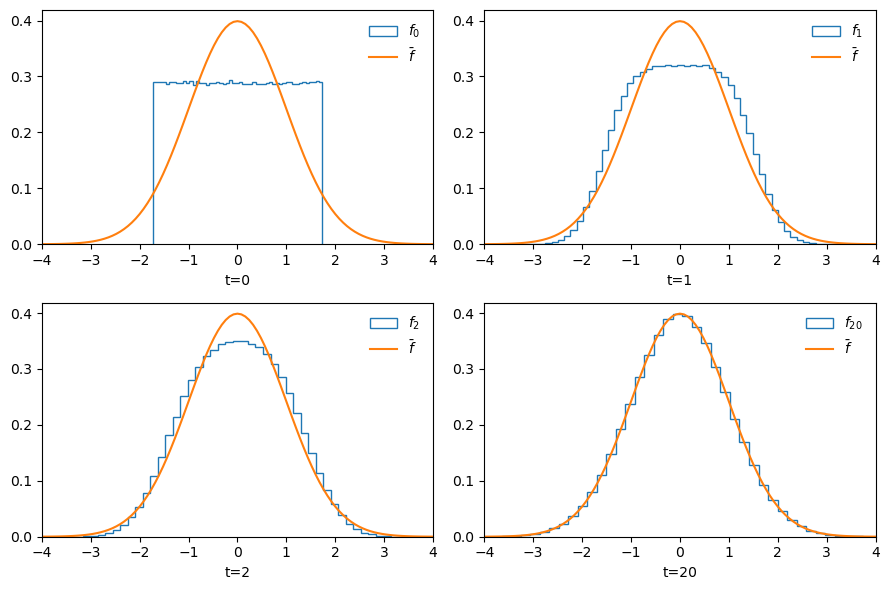

In [7]:
ar1 = [x0, x1, x2, x]
dist = ['$f_0$', '$f_1$', '$f_2$', '$f_{20}$']
time = ['t=0', 't=1', 't=2', 't=20']
xgrid = np.linspace(-4.0, 4.0, 101)
fig, ax = plt.subplots(2, 2, num=1, figsize=(9, 6), facecolor='w')
idx = 0
for row in range(2):
    for col in range(2):
        ax[row, col].hist(ar1[idx], density=True, bins=51, histtype='step')
        ax[row, col].plot(xgrid, st.norm.pdf(xgrid))
        ax[row, col].legend([dist[idx], '$\\bar f$'], loc='upper right', frameon=False)
        ax[row, col].set_xlabel(time[idx])
        ax[row, col].set_xlim(-4.0, 4.0)
        idx += 1
plt.tight_layout()
# plt.savefig('ms_fig_ar1_conv.png', dpi=300)
plt.show()